# Cardiovascular Disease Risk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model, model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, RocCurveDisplay
from matplotlib.colors import ListedColormap
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
palette = sns.color_palette("rocket")

darker = palette[0]
dark = palette[1]
medium = palette[2]
redish = palette[3]
light = palette[4]
lighter = palette[5]

colors = ['green' if (i == 0 and j == 0) or (i == 1 and j == 1) else 'red' for i in range(2) for j in range(2)]
cmap_cm = ListedColormap(colors)

sns.set_style('darkgrid')

cmap = sns.color_palette("rocket", as_cmap=True)
csvPath = "csv/cardio_train.csv"
# df has ; instead of , as separator
df = pd.read_csv(csvPath, sep=';')
df.drop('id', axis=1, inplace=True)

In [3]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [5]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
age = df['age']
# age est en nombre de jour, on le convertit en année
age = age / 365.25

In [7]:
df['age_in_year'] = age
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_year
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.302850
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.754967
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.563313
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.361396
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.943874
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.390144
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.922656


## Néttoyage des données

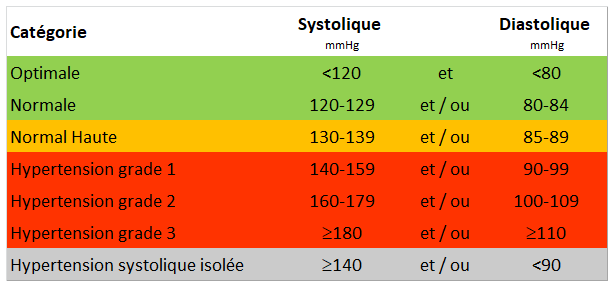

1) Valeurs seuilles pour les données aberrantes de la pression artérielle systolique et diastolique:   

(pression artérielle systolique pas de 20 -> -20 par rapport au minimun, +20 par rapport au maximum)
- systolique min = 100
- systolique max = 200

(pression artérielle diastolique pas de 10 -> -10 par rapport au minimun, +10 par rapport au maximum)
- diastolique min = 70
- diastolique max = 120

In [8]:
ap_hi_max = 200
ap_hi_min = 100
ap_lo_max = 120
ap_lo_min = 70

Suppression des valeurs aberrantes:

In [9]:
df = df[(df['ap_hi'] <= ap_hi_max) & (df['ap_hi'] >= ap_hi_min)]
df = df[(df['ap_lo'] <= ap_lo_max) & (df['ap_lo'] >= ap_lo_min)]

print("Nombres d'observation :", df.shape[0])

Nombres d'observation : 65336


## Boxplot Taille et Poids par rapport au genre

<Axes: xlabel='gender', ylabel='height'>

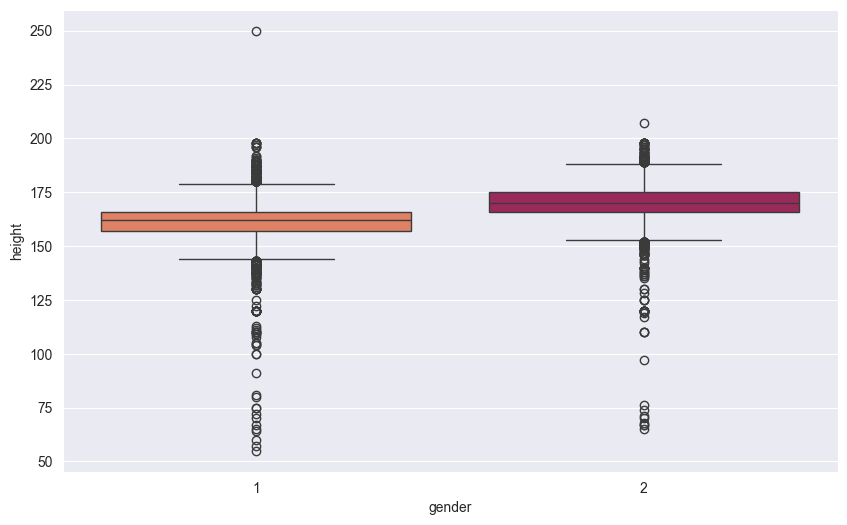

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='gender', y='height', hue='gender', legend=False, palette=[light, medium])

<Axes: xlabel='gender', ylabel='weight'>

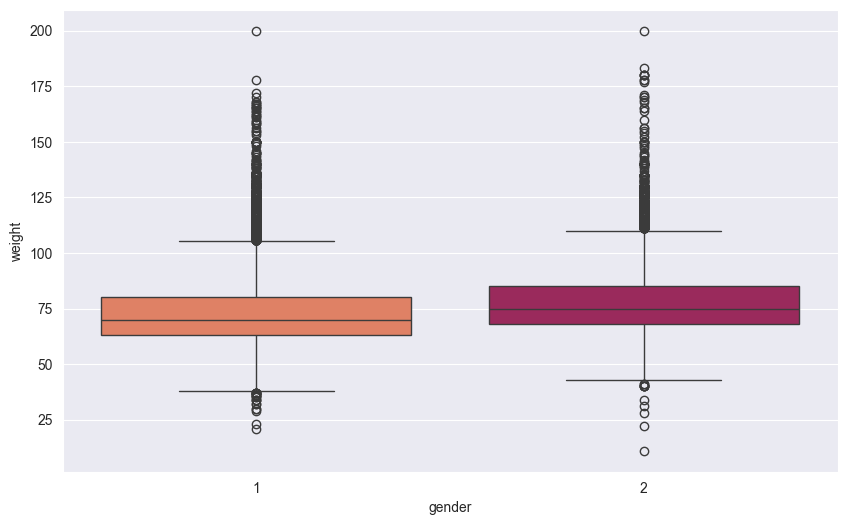

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='gender', y='weight', hue='gender', legend=False, palette=[light, medium])

2) Valeurs seuilles pour les données aberrantes du poids et de la taille:
(poids d'un adulte 40 à 50 kg = sous-nutrition (choix de limite à 50 kg), 200 kg = obésité morbide (choix de limite à 200 kg) car l'obésité peut être un facteur de risque pour les maladies cardiovasculaires)
- poids min = 50
- poids max = 200

(taille d'un adulte 140 à 200 cm)
- taille min = 140
- taille max = 200

In [12]:
weight_min = 50
weight_max = 130
height_min = 130
height_max = 180

Suppression des valeurs aberrantes:

In [13]:
df = df[(df['weight'] <= weight_max) & (df['weight'] >= weight_min)]
df = df[(df['height'] <= height_max) & (df['height'] >= height_min)]

<Axes: xlabel='gender', ylabel='height'>

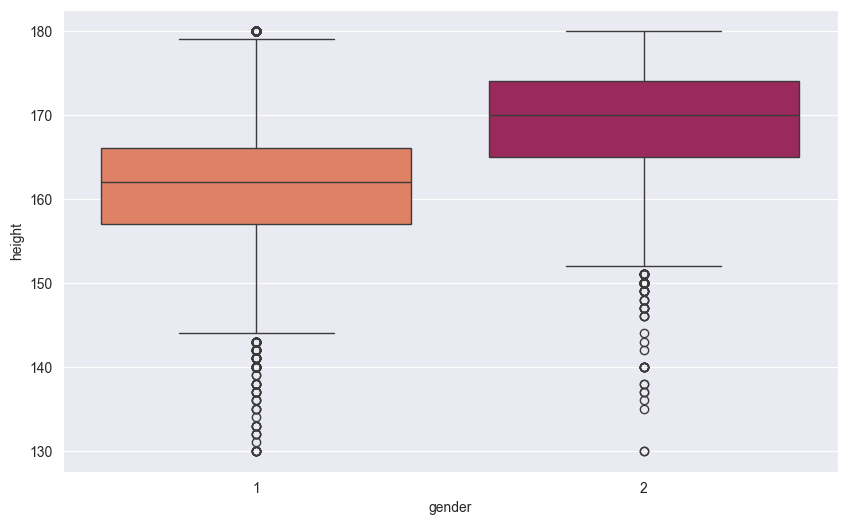

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='gender', y='height', hue='gender', legend=False, palette=[light, medium])

<Axes: xlabel='gender', ylabel='weight'>

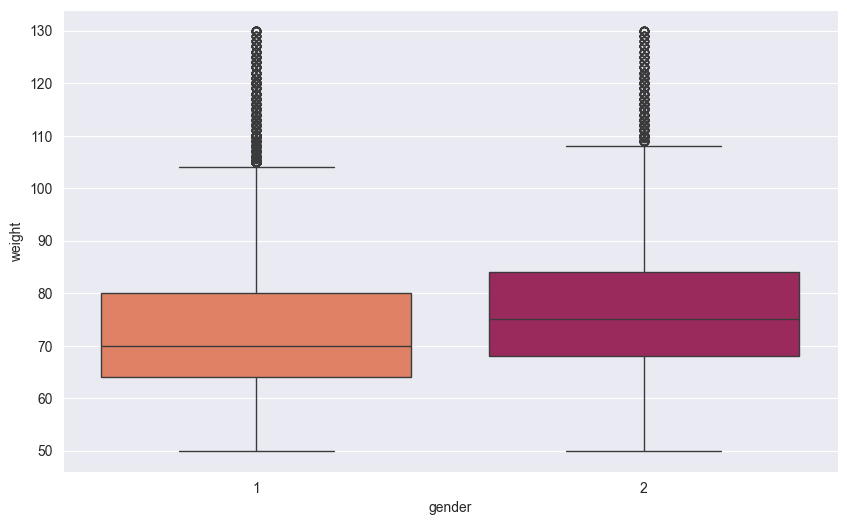

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='gender', y='weight', hue='gender', legend=False, palette=[light, medium])

In [16]:
print("Nombres d'observation :", df.shape[0])

Nombres d'observation : 62954


In [17]:
print("Pourcentage d'observations supprimées :", (70000 - df.shape[0]) / 70000 * 100 , "%")

Pourcentage d'observations supprimées : 10.065714285714286 %


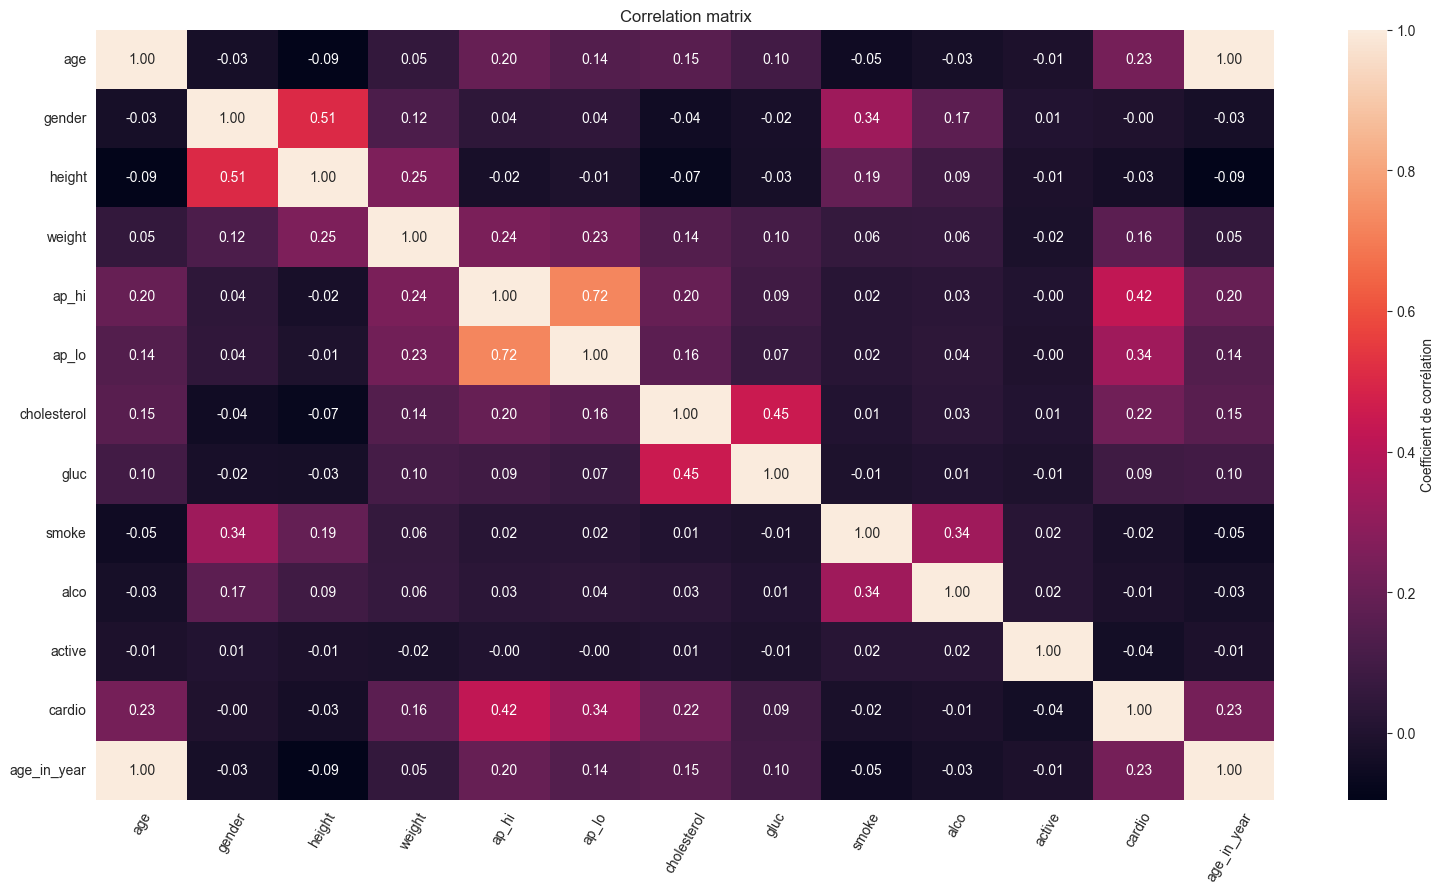

In [18]:
# heatmap
plt.figure(figsize=(19, 10))
plt.title('Correlation matrix')
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap=cmap, cbar_kws={'label': 'Coefficient de corrélation'})
plt.yticks(rotation=0)
plt.xticks(rotation=60)
plt.show()

### Suppression des doublons

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
print("Nombres d'observation :", df.shape[0])

Nombres d'observation : 62930


### ajout d'une colone age en tranche de 5 ans

In [21]:
df['range_age'] = (df['age_in_year'] // 5) * 5
df['range_age'] = df['range_age'].astype(int)

### affichage age par tranches de 5 ans

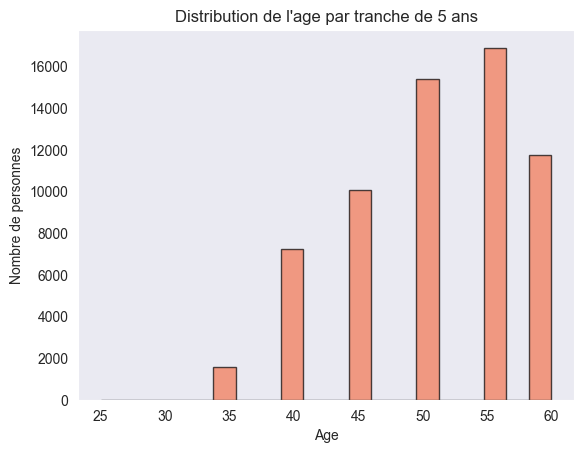

In [22]:
df['range_age'].hist(bins=20, color=light, edgecolor='black', alpha=0.7, grid=False)
plt.title("Distribution de l'age par tranche de 5 ans")
plt.xlabel('Age')
plt.ylabel('Nombre de personnes')
plt.show()

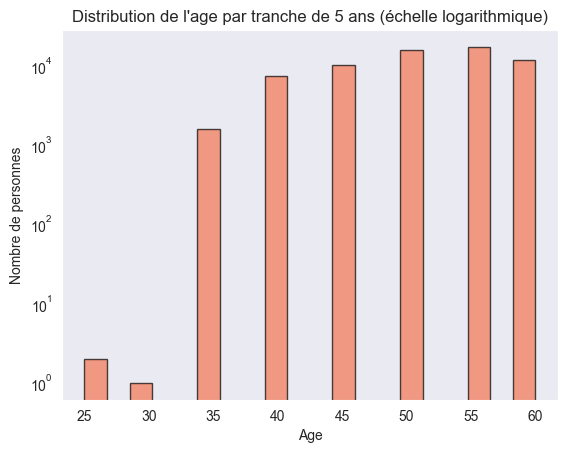

In [23]:
age = df['range_age']
age.hist(bins=20, log=True,color=light, edgecolor='black', alpha=0.7, grid=False)
plt.title("Distribution de l'age par tranche de 5 ans (échelle logarithmique)")
plt.xlabel('Age')
plt.ylabel('Nombre de personnes')
plt.show()

### ajout d'une colone taille en tranche de 25 cm

In [24]:
df['range_height'] = (df['height'] // 25) * 25
df['range_height'] = df['range_height'].astype(int)

### ajout d'une colonne poids en tranche de 10 kg

In [25]:
df['range_weight'] = (df['weight'] // 10) * 10
df['range_weight'] = df['range_weight'].astype(int)

### ajout d'une colonne IMC

In [26]:
df['imc'] = df['weight'] / (df['height'] / 100) ** 2

### ajout d'une colonne IMC_observation 1 = maigre(<18.5), 2 = normal(18.5-24.9), 3 = surpoids(25-29.9), 4 = obèse(>30)

In [27]:
df['imc_observation'] = 0
df.loc[df['imc'] < 18.5, 'imc_observation'] = 1
df.loc[(df['imc'] >= 18.5) & (df['imc'] < 25), 'imc_observation'] = 2
df.loc[(df['imc'] >= 25) & (df['imc'] < 30), 'imc_observation'] = 3
df.loc[df['imc'] >= 30, 'imc_observation'] = 4

In [28]:
print("Nombres d'observation :", df.shape[0])

Nombres d'observation : 62930


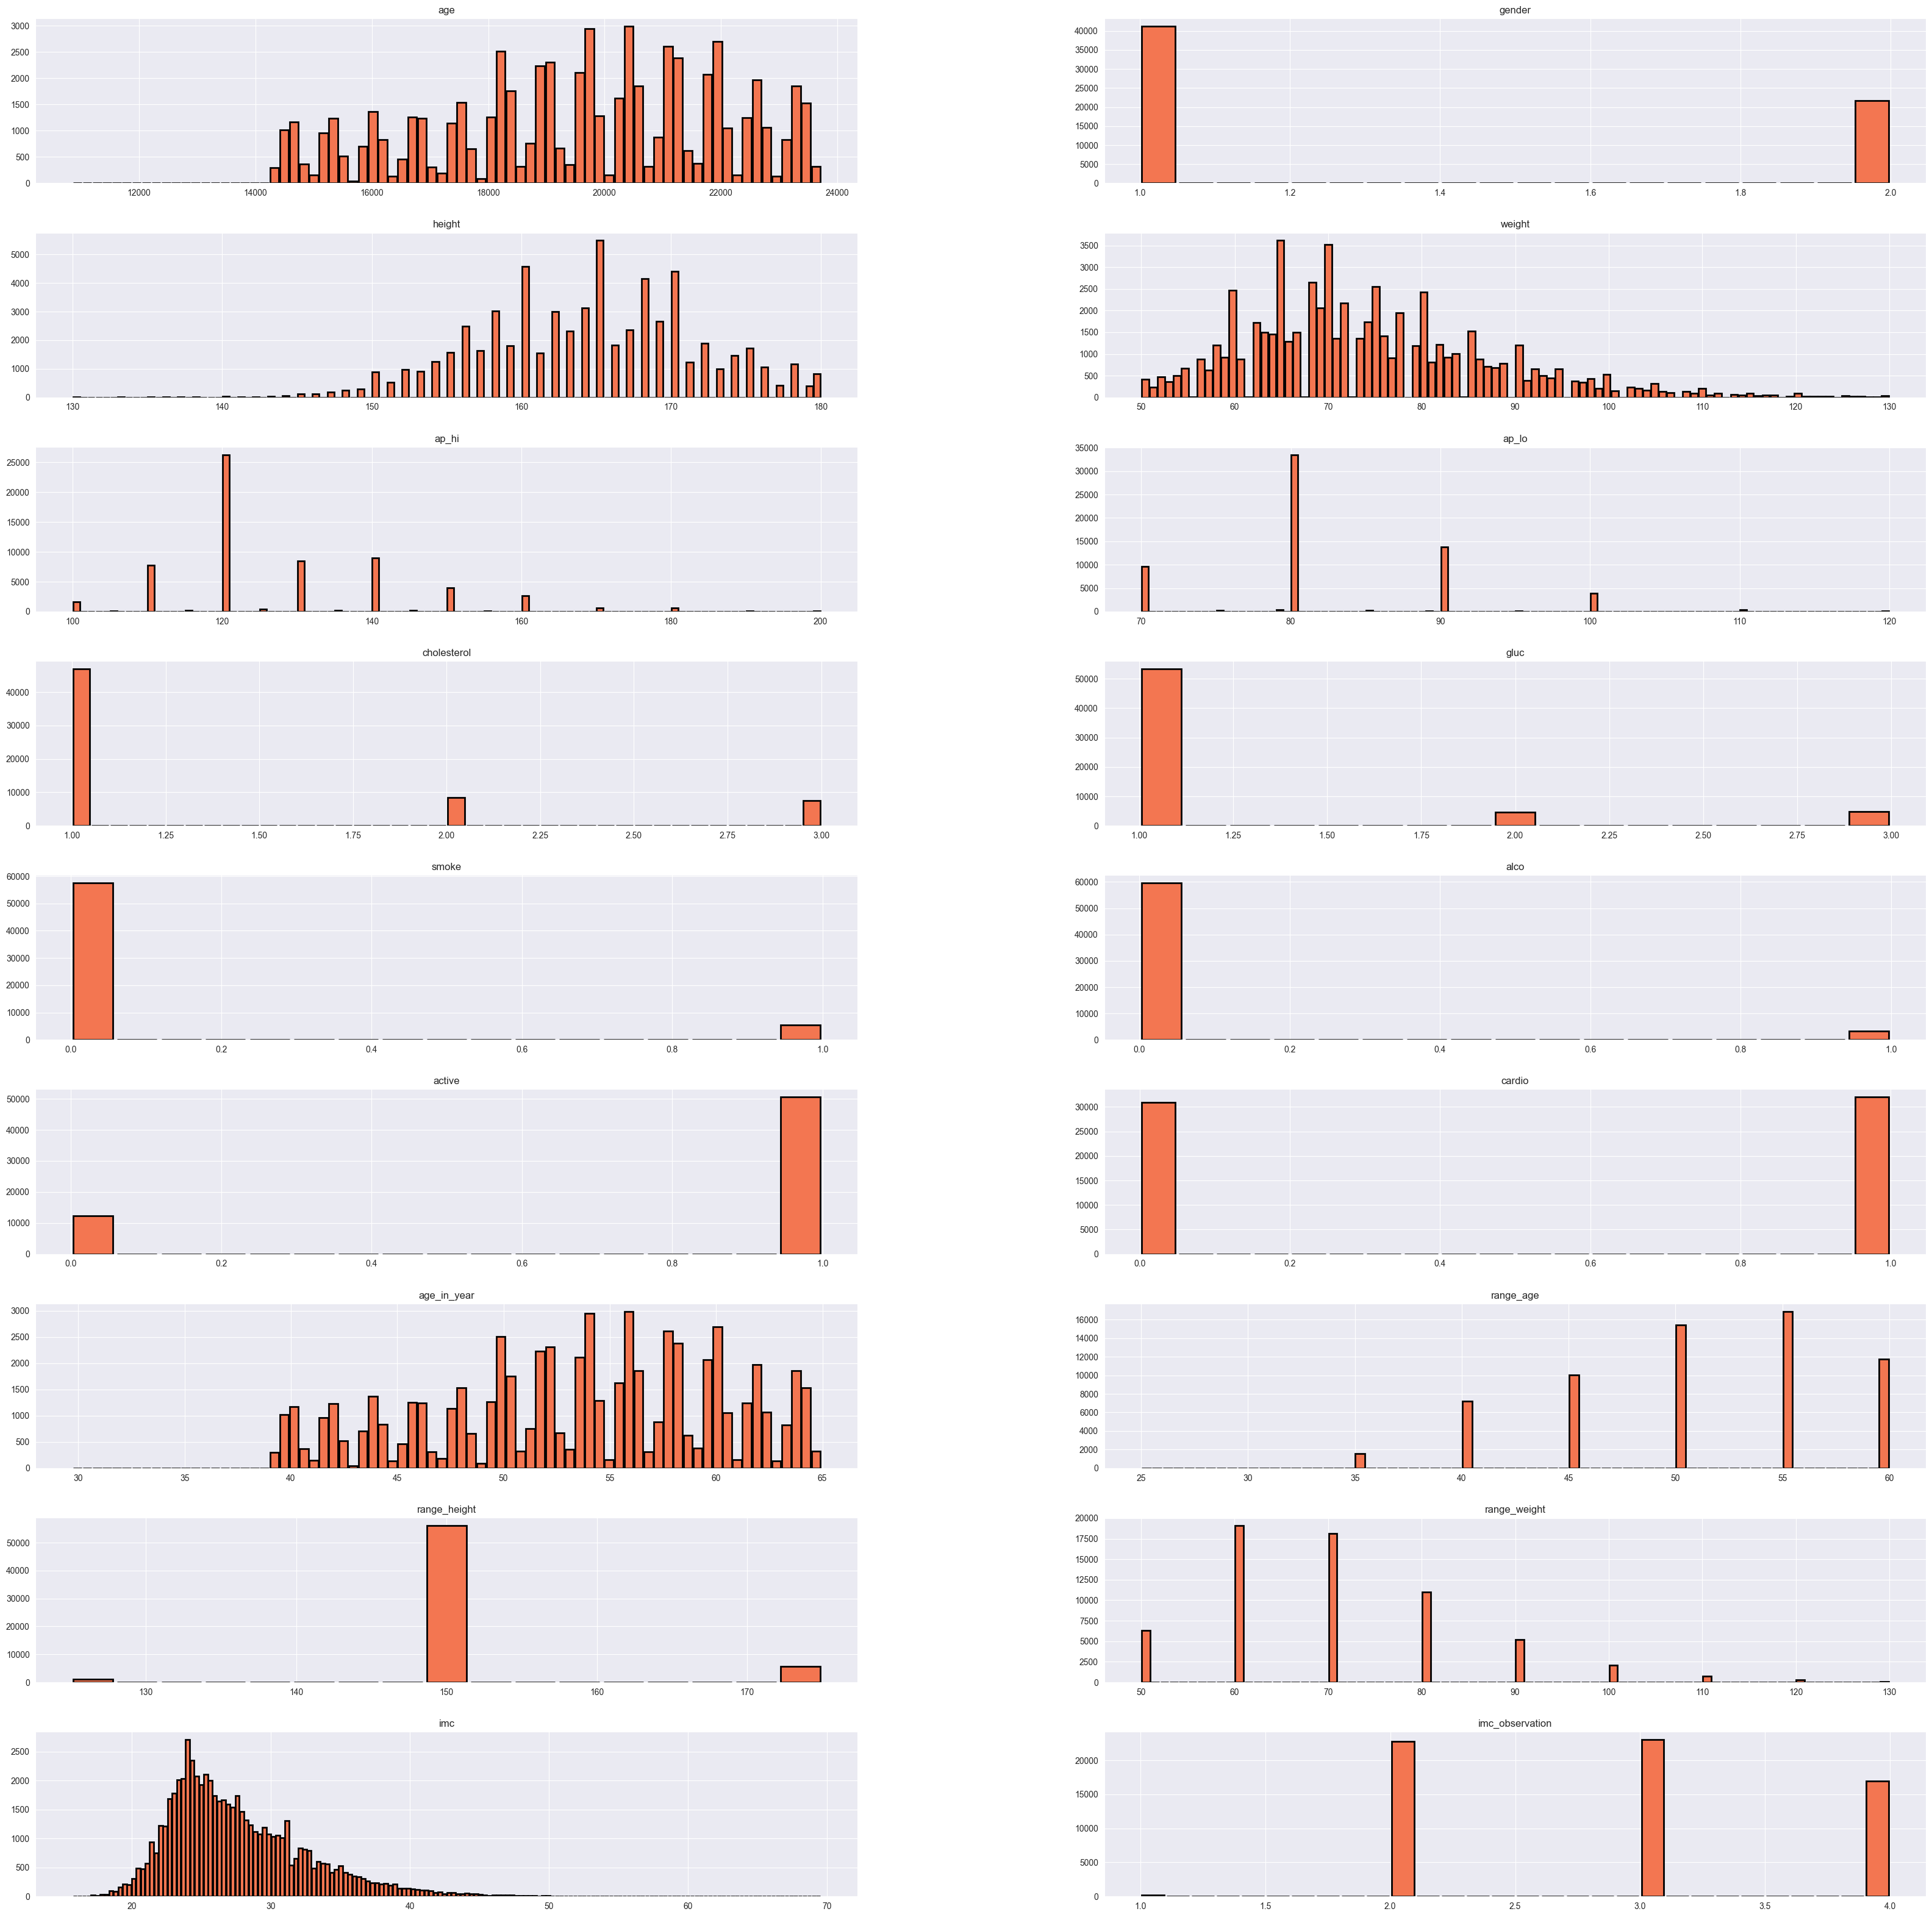

In [29]:
# histogrammes
df.hist(figsize=(40, 40), color=light, bins='auto', grid=True, edgecolor='black', linewidth=2, zorder=2, layout=(9, 2), rwidth=0.9, histtype='bar', align='mid', orientation='vertical')
plt.show()

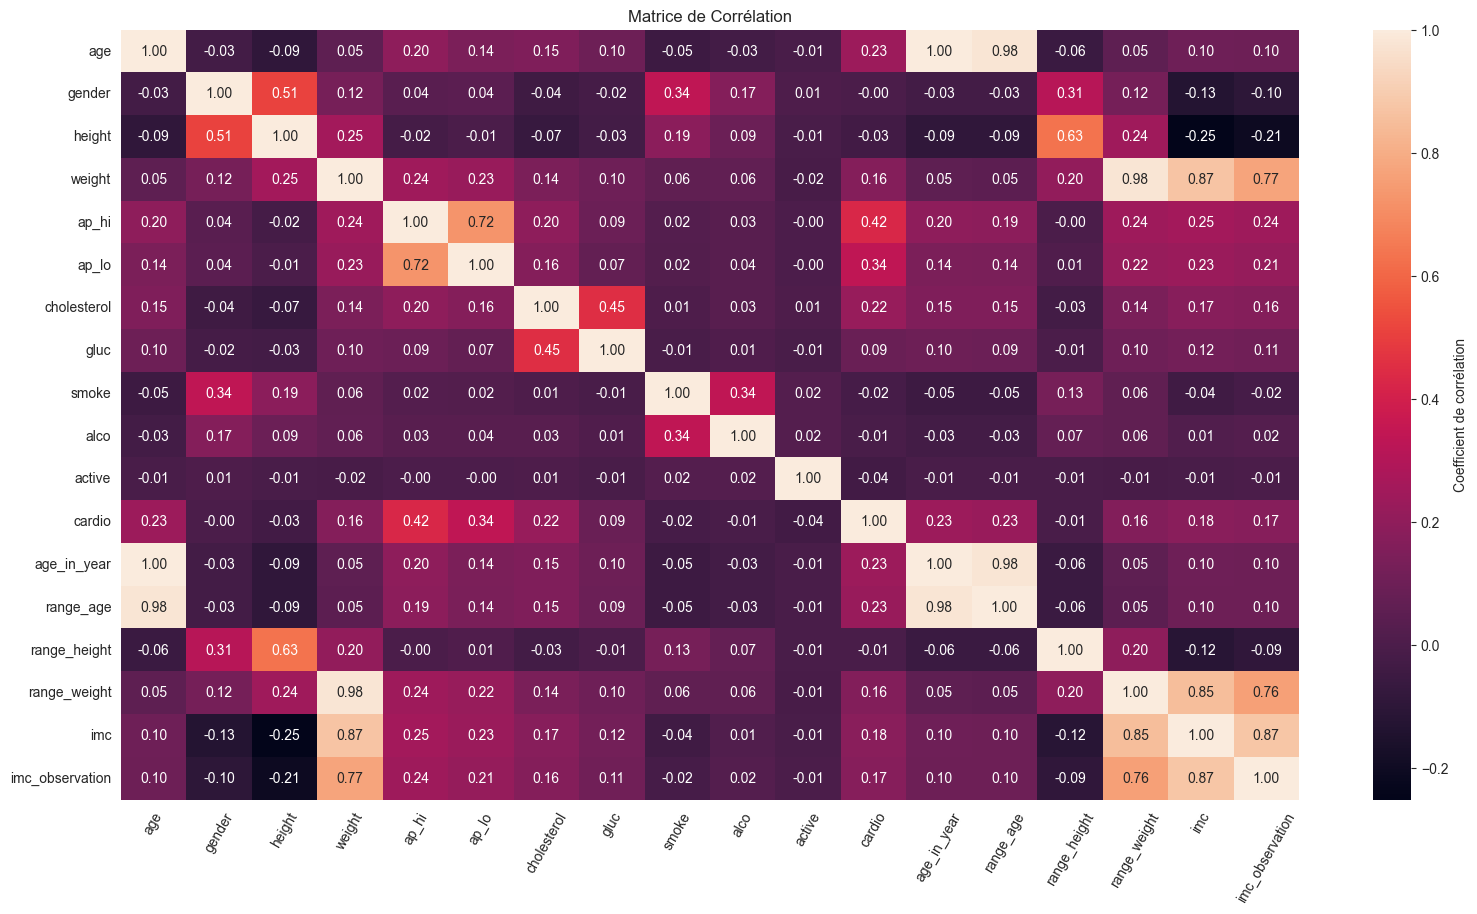

In [30]:
# heatmap
plt.figure(figsize=(19, 10))
plt.title('Matrice de Corrélation')
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap=cmap, cbar_kws={'label': 'Coefficient de corrélation'})
plt.yticks(rotation=0)
plt.xticks(rotation=60)
plt.show()

## Variables indépendantes et dépendante linéairement corrélées

Le risque de maladie cardiovasculaire est la variable dépendante.   
Les variables explicatives sont:
- la pression systolique (Ap_hi) - 42% de corrélation
- la pression diastolique (Ap_lo) - 34% de corrélation
- l'âge - 23% de corrélation
- le cholestérol - 22% de corrélation
- le poids - 16% de corrélation

## 2D Plot de cardio et de toutes les autres variables

Création de deux dataframes pour les malades et les non malades en fonction de la variable cardio.

In [31]:
healthy = df[df['cardio'] == 0]
sick = df[df['cardio'] == 1]

Pour chaque colonne (sauf cardio), lineplot de la distribution des valeurs pour les malades et les non malades

### Kernel Density Estimate (KDE) plot

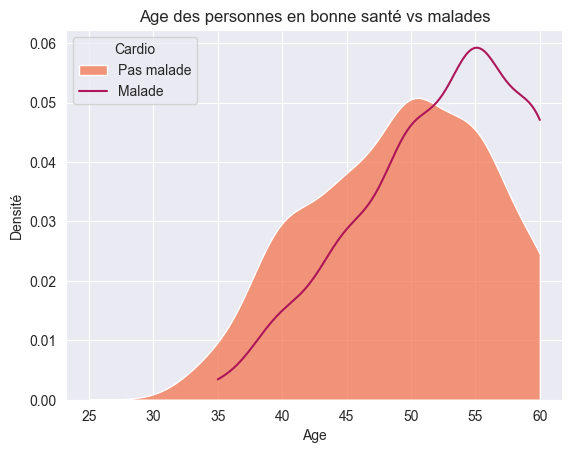

In [32]:
plt.figsize=(10, 10)
plt.title('Age des personnes en bonne santé vs malades')
sns.set_style('darkgrid')
sns.kdeplot(healthy['range_age'], color=light, label='Pas malade', fill=True, bw_adjust=3, cut=0, multiple="stack")
sns.kdeplot(sick['range_age'], color=medium, label='Malade', fill=False, bw_adjust=3, cut=0, multiple="stack")
plt.xlabel('Age')
plt.ylabel('Densité')
plt.legend(title='Cardio', loc='upper left', labels=['Pas malade', 'Malade'])
plt.show()

Observation: Plus l'âge augmente, plus le risque de maladie cardiovasculaire augmente; À partir de 50 ans, il y a plus de malades que de non malades.   
Il n'y a pas de malade avant 35 ans.

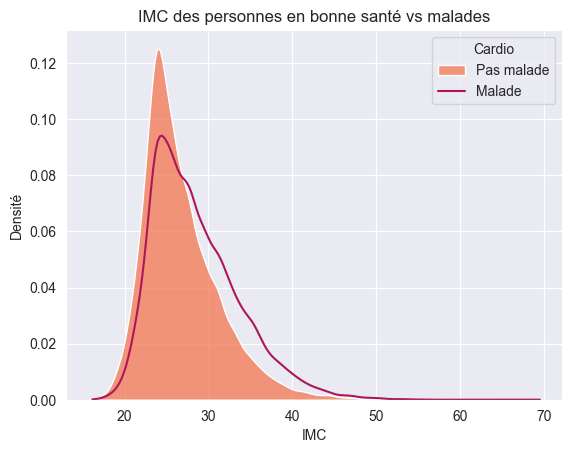

In [33]:
plt.figsize=(10, 10)
plt.title('IMC des personnes en bonne santé vs malades')
sns.kdeplot(healthy['imc'], color=light, label='Pas malade', fill=True, bw_adjust=1, cut=0, multiple="stack")
sns.kdeplot(sick['imc'], color=medium, label='Malade', fill=False, bw_adjust=1, cut=0, multiple="stack")
plt.xlabel('IMC')
plt.ylabel('Densité')
plt.legend(title='Cardio', loc='upper right', labels=['Pas malade', 'Malade'])
plt.show()

Observation: Il y a plus de personnes saines avec un IMC normal (18.5 à 24.9) que de personnes malades.   
Il y a plus de personnes malades avec un IMC élevé (25 à 47) que de personnes saines.   
Il n'y a plus de personnes saine au delà de 47 d'IMC.

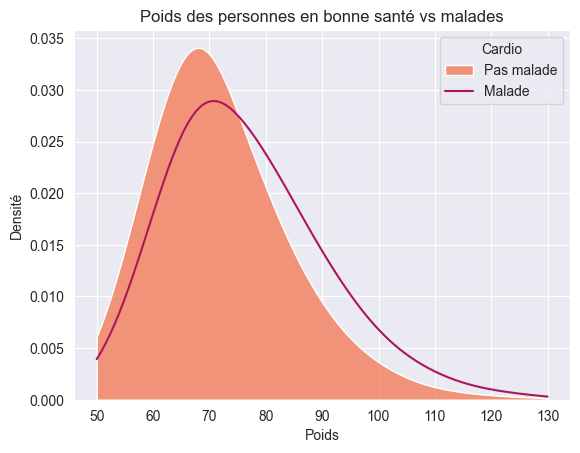

In [34]:
plt.figsize=(10, 10)
plt.title('Poids des personnes en bonne santé vs malades')
sns.kdeplot(healthy['weight'], color=light, label='Pas malade', fill=True, bw_adjust=3, cut=0, multiple="stack")
sns.kdeplot(sick['weight'], color=medium, label='Malade', fill=False, bw_adjust=3, cut=0, multiple="stack")
plt.xlabel('Poids')
plt.ylabel('Densité')
plt.legend(title='Cardio', loc='upper right', labels=['Pas malade', 'Malade'])
plt.show()

Observation: Entre 50 et 75kg, il y a plus de personnes saines que de personnes malades.   
À partir de 75kg, il y a plus de personnes malades que de personnes saines.   
Il n'y a pratiquement plus de personnes saines au delà de 120kg

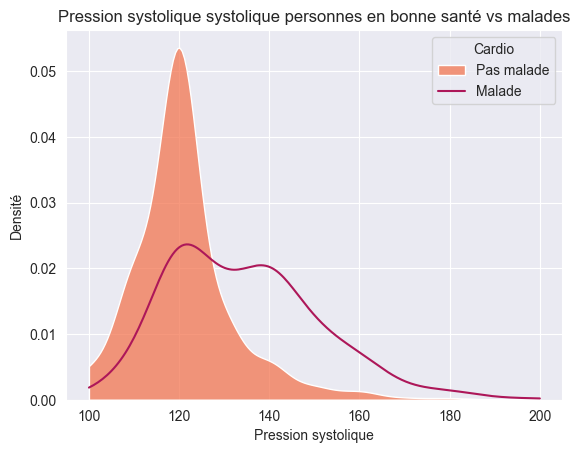

In [35]:
plt.figsize=(10, 10)
plt.title('Pression systolique systolique personnes en bonne santé vs malades')
sns.set_style('darkgrid')
sns.kdeplot(healthy['ap_hi'], color=light, label='Pas malade', fill=True, bw_adjust=3, cut=0, multiple="stack")
sns.kdeplot(sick['ap_hi'], color=medium, label='Malade', fill=False, bw_adjust=3, cut=0, multiple="stack")
plt.xlabel('Pression systolique')
plt.ylabel('Densité')
plt.legend(title='Cardio', loc='upper right', labels=['Pas malade', 'Malade'])
plt.show()

Observation: Il y a plus de personnes saines avec une pression artérielle normale ou un peu élevée (100 à 130) que de personnes malades.   
Il y a plus de personnes malades avec une pression artérielle élevée (130 à 200) que de personnes saines.   
Il n'y a pratiquement plus de personnes saines avec une pression artérielle au delà de 160.

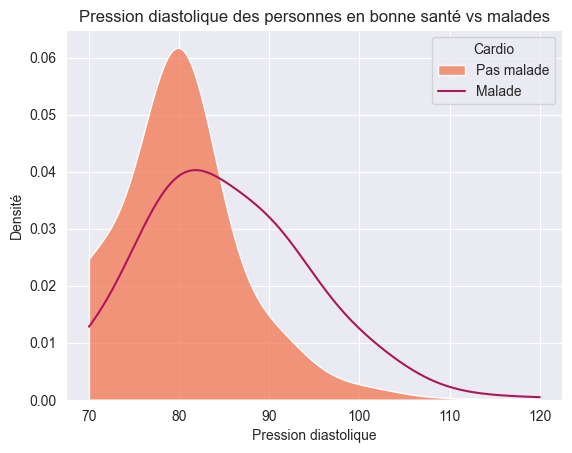

In [36]:
plt.figsize=(10, 10)
plt.title('Pression diastolique des personnes en bonne santé vs malades')
sns.set_style('darkgrid')
sns.kdeplot(healthy['ap_lo'], color=light, label='Pas malade', fill=True, bw_adjust=5, cut=0, multiple="stack")
sns.kdeplot(sick['ap_lo'], color=medium, label='Malade', fill=False, bw_adjust=5, cut=0, multiple="stack")
plt.xlabel('Pression diastolique')
plt.ylabel('Densité')
plt.legend(title='Cardio', loc='upper right', labels=['Pas malade', 'Malade'])
plt.show()

Observation: Il y a plus de personnes saines avec une pression artérielle diastolique normale (70 à 84) que de personnes malades.   
Il y a plus de personnes malades avec une pression artérielle diastolique élevée (84 à 120) que de personnes saines.   
Il n'y a pratiquement plus de personnes saines avec une pression artérielle diastolique au delà de 105.

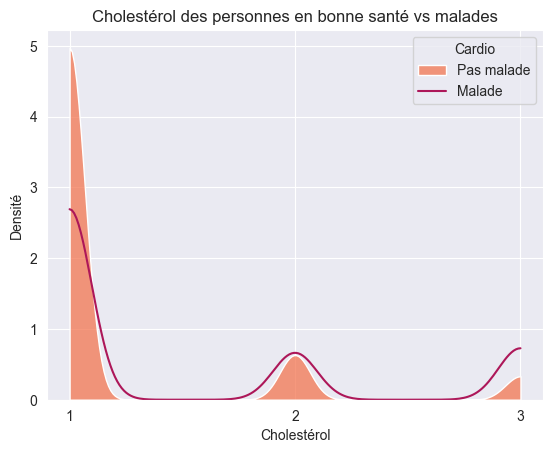

In [37]:
plt.figsize=(10, 10)
plt.title('Cholestérol des personnes en bonne santé vs malades')
sns.set_style('darkgrid')
sns.kdeplot(healthy['cholesterol'], color=light, label='Pas malade', fill=True, bw_adjust=1, cut=0, multiple="stack")
sns.kdeplot(sick['cholesterol'], color=medium, label='Malade', fill=False, bw_adjust=1, cut=0, multiple="stack")
plt.xlabel('Cholestérol')
plt.ylabel('Densité')
plt.xticks([1, 2, 3])
plt.legend(title='Cardio', loc='upper right', labels=['Pas malade', 'Malade'])
plt.show()

Observation: Il y a plus de personnes saines avec un taux de cholestérol normal (1) que de personnes malades.   
Il y a autant de personnes malades avec un taux de cholestérol élevé (2) que de personnes saines.   
Il y a plus de personnes malades avec un taux de cholestérol très élevé (3) que de personnes saines.

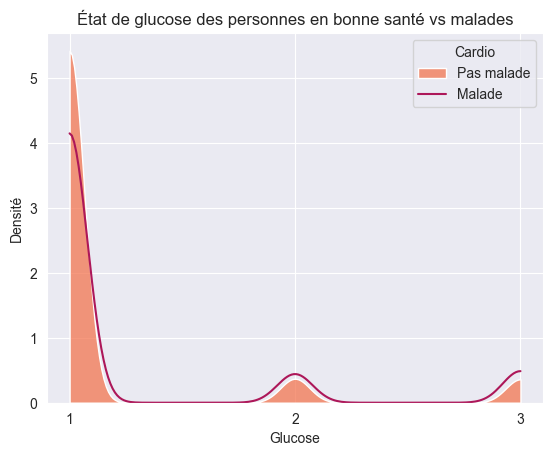

In [38]:
plt.figsize=(10, 10)
plt.title('État de glucose des personnes en bonne santé vs malades')
sns.set_style('darkgrid')
sns.kdeplot(healthy['gluc'], color=light, label='Pas malade', fill=True, bw_adjust=1, cut=0, multiple="stack")
sns.kdeplot(sick['gluc'], color=medium, label='Malade', fill=False, bw_adjust=1, cut=0, multiple="stack")
plt.xlabel('Glucose')
plt.ylabel('Densité')
plt.xticks([1, 2, 3])
plt.legend(title='Cardio', loc='upper right', labels=['Pas malade', 'Malade'])
plt.show()

Observation: Il y a plus de personnes saines avec un taux de glucose normal (1) que de personnes malades.   
Il y a plus de personnes malades avec un taux de glucose élevé (2) ou très élevé (3) que de personnes saines.

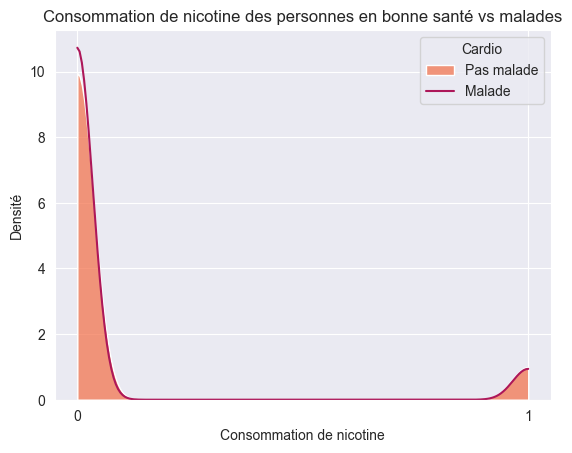

In [39]:
plt.figsize=(10, 10)
plt.title('Consommation de nicotine des personnes en bonne santé vs malades')
sns.set_style('darkgrid')
sns.kdeplot(healthy['smoke'], color=light, label='Pas malade', fill=True, bw_adjust=1, cut=0, multiple="stack")
sns.kdeplot(sick['smoke'], color=medium, label='Malade', fill=False, bw_adjust=1, cut=0, multiple="stack")
plt.xlabel('Consommation de nicotine')
plt.ylabel('Densité')
plt.xticks([0, 1])
plt.legend(title='Cardio', loc='upper right', labels=['Pas malade', 'Malade'])
plt.show()

Observation: Il y a en générale plus de personnes malades que de personnes saines.   
La consommation de tabac seul n'est pas un facteur de risque pour les maladies cardiovasculaires.

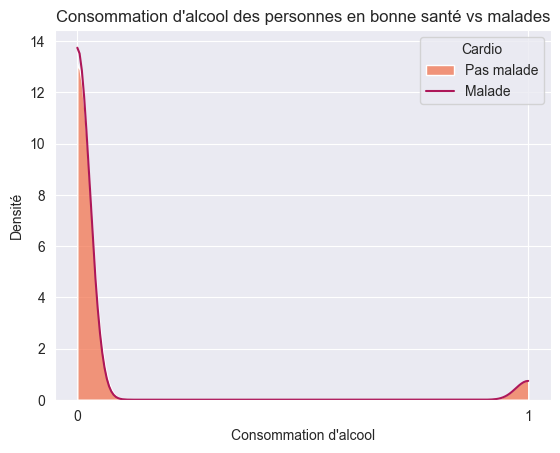

In [40]:
plt.figsize=(10, 10)
plt.title("Consommation d'alcool des personnes en bonne santé vs malades")
sns.set_style('darkgrid')
sns.kdeplot(healthy['alco'], color=light, label='Pas malade', fill=True, bw_adjust=1, cut=0, multiple="stack")
sns.kdeplot(sick['alco'], color=medium, label='Malade', fill=False, bw_adjust=1, cut=0, multiple="stack")
plt.xlabel("Consommation d'alcool")
plt.ylabel('Densité')
plt.xticks([0, 1])
plt.legend(title='Cardio', loc='upper right', labels=['Pas malade', 'Malade'])
plt.show()

Observation: Il y a en générale  plus de personnes malades que de personnes saines.   
La consommation d'alcool seul n'est pas un facteur de risque pour les maladies cardiovasculaires.

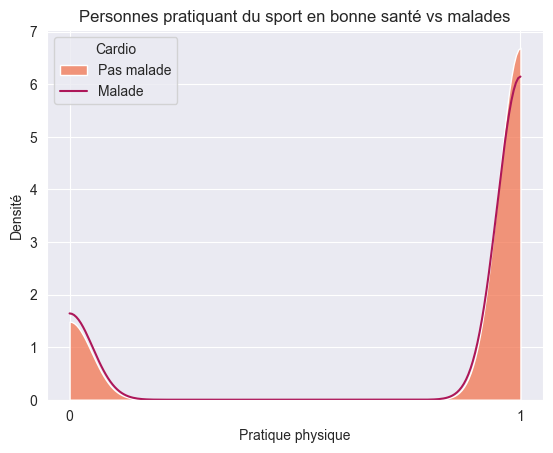

In [41]:
plt.figsize=(10, 10)
plt.title("Personnes pratiquant du sport en bonne santé vs malades")
sns.set_style('darkgrid')
sns.kdeplot(healthy['active'], color=light, label='Pas malade', fill=True, bw_adjust=1, cut=0, multiple="stack")
sns.kdeplot(sick['active'], color=medium, label='Malade', fill=False, bw_adjust=1, cut=0, multiple="stack")
plt.xlabel("Pratique physique")
plt.ylabel('Densité')
plt.xticks([0, 1])
plt.legend(title='Cardio', loc='upper left', labels=['Pas malade', 'Malade'])
plt.show()

Observation: Il y a plus de personnes malades que de personnes saines qui ne pratiquent pas d'activité physique.   
Il y a plus de personnes saines que de personnes malades qui pratiquent une activité physique.

In [42]:
# comportement à risque en classe: -1 = virtueux, 0 = "normal" (fumeur ou alcool + sport, ou rien), 1 = risk (fumeur ou alcool + pas de sport, ou fumeur et alcool + sport), 2 = grand risk (fumeur et alcool + pas de sport)
df['risk_behaviour'] = 0
df['risk_behaviour'] = df['smoke'] + df['alco'] - df['active']

healthy = df[df['cardio'] == 0]
sick = df[df['cardio'] == 1]

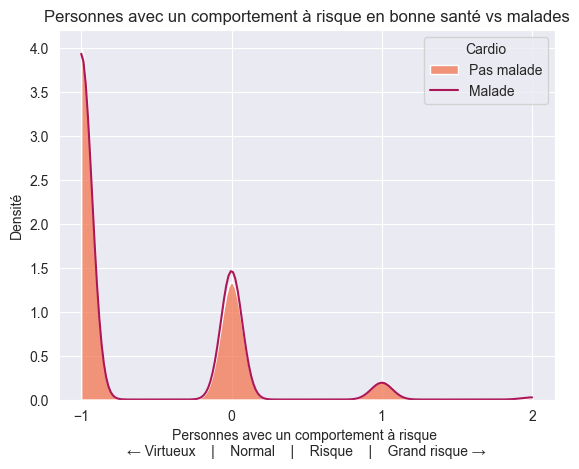

In [43]:
plt.figsize=(10, 10)
plt.title("Personnes avec un comportement à risque en bonne santé vs malades")
sns.set_style('darkgrid')
sns.kdeplot(healthy['risk_behaviour'], color=light, label='Pas malade', fill=True, bw_adjust=1, cut=0, multiple="stack")
sns.kdeplot(sick['risk_behaviour'], color=medium, label='Malade', fill=False, bw_adjust=1, cut=0, multiple="stack")
plt.xlabel("Personnes avec un comportement à risque \n← Virtueux    |    Normal    |    Risque    |    Grand risque →")
plt.ylabel('Densité')
plt.xticks([-1, 0, 1, 2])
plt.legend(title='Cardio', loc='upper right', labels=['Pas malade', 'Malade'])
plt.show()

Observation: Il y a autant de personnes malades que de personnes saines qui ont un comportement virtueux (ne fume pas, ne boit pas, pratique une activité physique).   
Il y a plus de personnes malades que de personnes saines qui ont un comportement "normal".   
Il y a autant de personnes malades que de personnes saines qui ont un "mauvais" comportement.

In [44]:
# ajout d'une colone sexe 1 = femme, 2 = homme
df['sexe'] = 'Femme'
df.loc[df['gender'] == 2, 'sexe'] = 'Homme'

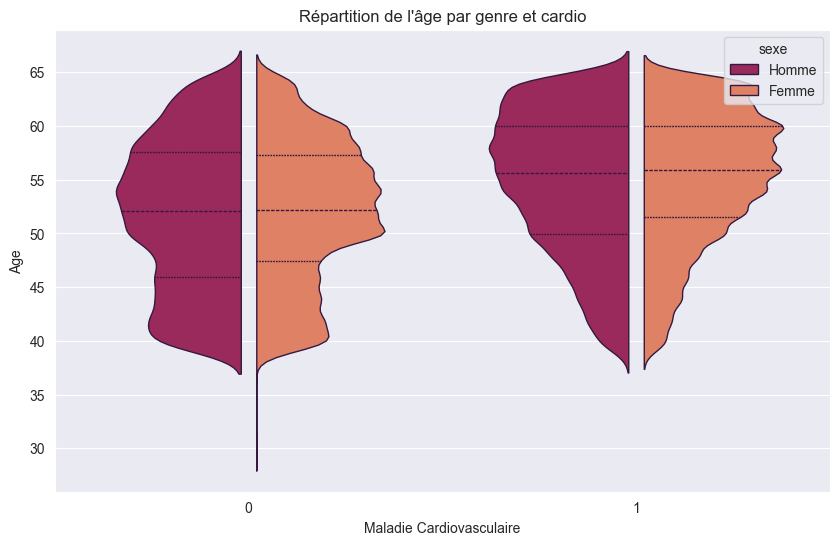

In [45]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='cardio', y='age_in_year', hue='sexe', split=True, inner='quartile', gap=.1, linecolor=darker, linewidth=1, palette={'Femme': light, 'Homme': medium})
plt.title('Répartition de l\'âge par genre et cardio')
plt.xlabel('Maladie Cardiovasculaire')
plt.ylabel('Age')
plt.show()

Observation: 25% de la population masculine malade le sont avant 50 ans.   
Pour la population feminine, 25% des malades le sont avant 53 ans.  
La distribution de l'âge est identique pour les hommes et les femmes.   
Le risque de maladie cardiovasculaire est n'est pas lié au sexe.

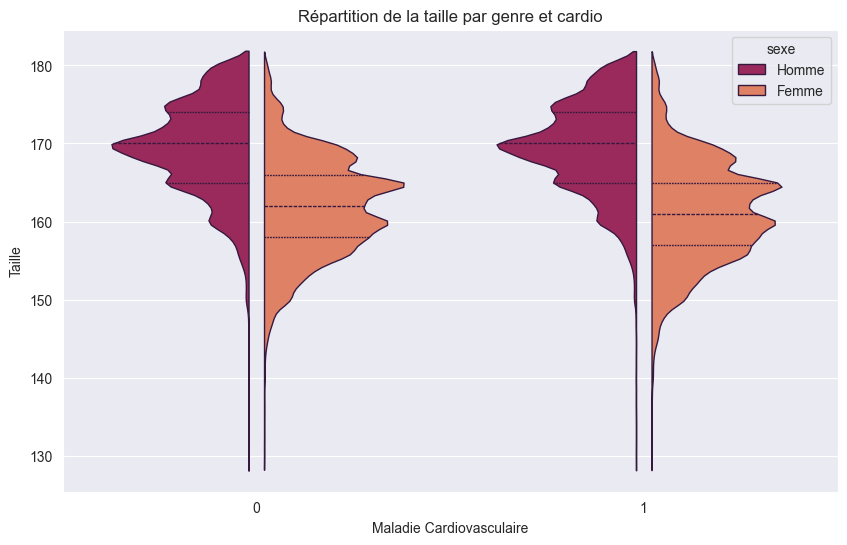

In [46]:
# violin plot, gender - height - cardio split gap=.1
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='cardio', y='height', hue='sexe', split=True, inner='quartile', gap=.1, linecolor=darker, linewidth=1, palette={'Femme': light, 'Homme': medium})
plt.title('Répartition de la taille par genre et cardio')
plt.xlabel('Maladie Cardiovasculaire')
plt.ylabel('Taille')
plt.show()

Observation: 75% des femmes sont moins grandes que 25% des hommes.   
La distribution de la taille est identiques pour les malades et les non malades.   
La taille n'est pas un facteur de risque pour les maladies cardiovasculaires.

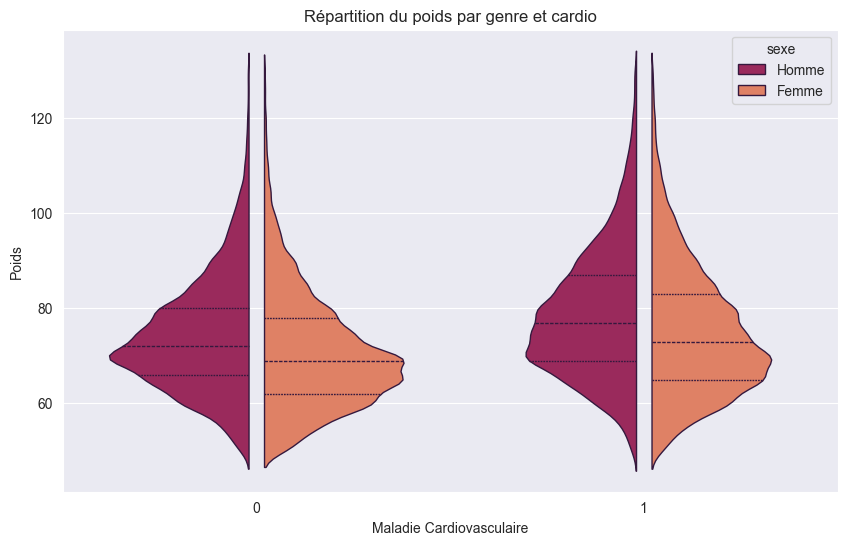

In [47]:
# violin plot, gender - weight - cardio split gap=.1
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='cardio', y='weight', hue='sexe', split=True, inner='quartile', gap=.1, linecolor=darker, linewidth=1, palette={'Femme': light, 'Homme': medium})
plt.title('Répartition du poids par genre et cardio')
plt.xlabel('Maladie Cardiovasculaire')
plt.ylabel('Poids')
plt.show()

Observation: Chez les hommes non malades, 75% ont un poids inférieur à 80 kg avec un pic à 70kg, alors que chez les hommes malades, 25% ont un poids supérieur à 90 kg.   
Chez les femmes, 75% de non malades ont un poids inférieur à 79 kg, alors que 25% des malades ont un poids supérieur à 82 kg.   
Le poids est un facteur de risque pour les maladies cardiovasculaires.

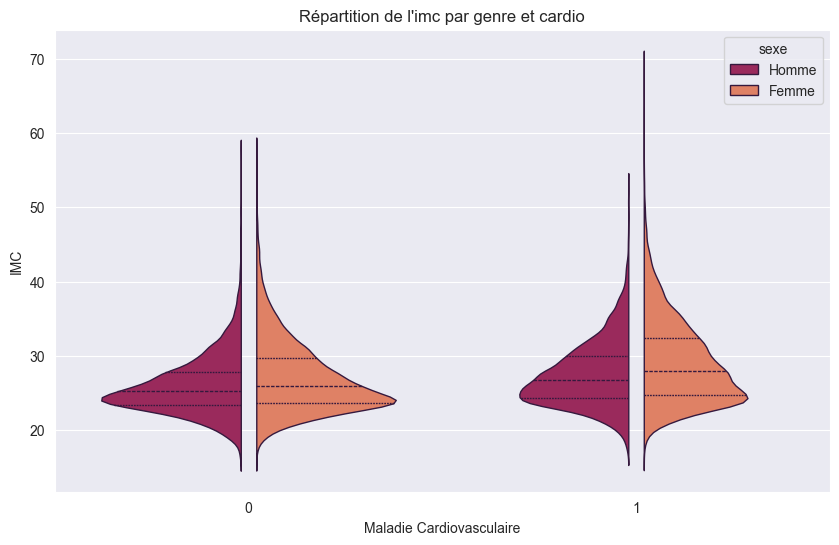

In [48]:
# violin plot, gender - imc - cardio split gap=.1
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='cardio', y='imc', hue='sexe', split=True, inner='quartile', gap=.1, linecolor=darker, linewidth=1, palette={'Femme': light, 'Homme': medium})
plt.title('Répartition de l\'imc par genre et cardio')
plt.xlabel('Maladie Cardiovasculaire')
plt.ylabel('IMC')
plt.show()

Observation: Chez les hommes non malades, 75% ont un imc inférieur à 28, alors que chez les hommes malades, 25% ont un imc supérieur à 30.   
Chez les femmes, 75% de non malades ont un imc inférieur à 30, alors que 25% des malades ont un imc supérieur à 33.   
L'IMC, qui est une combinaison du poids et de la taille, est un facteur de risque pour les maladies cardiovasculaires.

Conclusion: Les facteurs de risque pour les maladies cardiovasculaires sont:
- l'âge
- le poids
- l'IMC (qui est une combinaison du poids et de la taille)
- la pression artérielle (systolique et diastolique)
- le taux de cholestérol
- le taux de glucose
- le sport

## Régression logistique avec validation croisé 

### Questionnement: Utilisation de l'IMC et le poids ?

Dans notre cas, nous choisissons de ne pas utiliser le poids au profit de l'IMC pour éviter la multicolinéarité.

In [49]:
X = df[['age', 'ap_hi', 'ap_lo', 'cholesterol', 'imc', 'gluc', 'active', 'risk_behaviour']]
y = df['cardio']

## Z-score standardisation:

In [50]:
standardizer = StandardScaler().fit(X)

In [51]:
X_standardized = standardizer.transform(X)
X_standardized = pd.DataFrame(X_standardized, columns=X.columns)

In [52]:
Standardized = linear_model.LogisticRegressionCV(penalty='l2', solver='newton-cg', cv=10, max_iter=20000)


X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, stratify=y)

In [53]:
Standardized.fit(X_train, y_train)

LogisticRegressionCV(cv=10, max_iter=20000, solver='newton-cg')

In [54]:
y_pred = Standardized.predict(X_test)

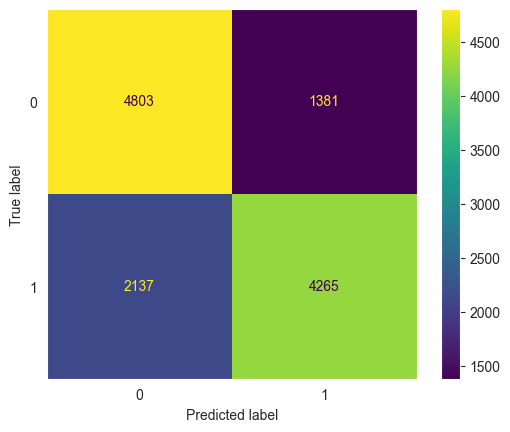

In [55]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
ConfusionMatrixDisplay(cm).plot()
plt.grid(False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


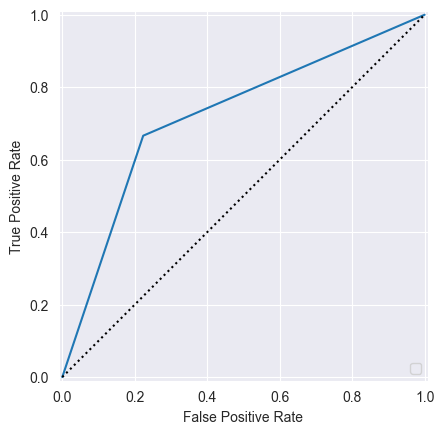

In [56]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot([0, 1], [0, 1], color='black', linestyle=':')
plt.show()

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73      6184
           1       0.76      0.67      0.71      6402

    accuracy                           0.72     12586
   macro avg       0.72      0.72      0.72     12586
weighted avg       0.72      0.72      0.72     12586



Je remarque que le score diffère entre la normalisation Min-Max, la standardisation Z-score et sans utilisation de méthode de mise à l'échelle, mais le changement n'est pas suffisament prononcé pour dire que l'une est meilleure que l'autre.

## Regression logistique personnelle

In [84]:
## Classe de regression perso uniquement

class LogisticRegression:

    def __init__(self, learning_rate=0.1, n_iterations=1000):
        """
        :param learning_rate: float, learning rate of the model
        :param n_iterations: int, number of iterations of the model
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weight = None
        self.bias = None

    def sigmoid(self, X):
        """
        :param X: np.array, input data
        :return: np.array
        """
        return 1 / (1 + np.exp(-X))

    def feed_forward(self, X):
        """
        :param X: np.array, input data
        :return: np.array
        """
        z = np.dot(X, self.weight) + self.bias
        A = self.sigmoid(z)

        return A

    def fit(self, X, y):
        """
        Train the model
        :param X: np.array, input data
        :param y: np.array, target data
        """
        n_samples, n_features = X.shape
        self.weight = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            A = self.feed_forward(X)
            dz = A - y

            dw = (1 / n_samples) * np.dot(X.T, dz)
            db = (1 / n_samples) * np.sum(A - y)

            self.weight -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        """
        Predict the target
        :param X: np.array, input data
        :return: np.array
        """
        threshold = 0.4
        y_hat = np.dot(X, self.weight) + self.bias
        y_predicted = self.sigmoid(y_hat)
        y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]

        return np.array(y_predicted_cls)



In [85]:
model = LogisticRegression(learning_rate=0.1, n_iterations=20000)

In [86]:
model.fit(X_train, y_train)

In [87]:
y_pred = model.predict(X_test)

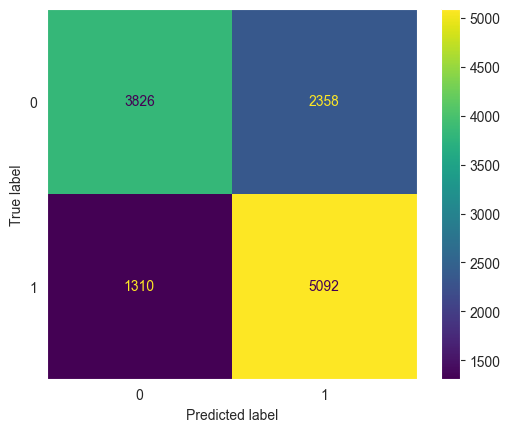

In [88]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
ConfusionMatrixDisplay(cm).plot()
plt.grid(False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


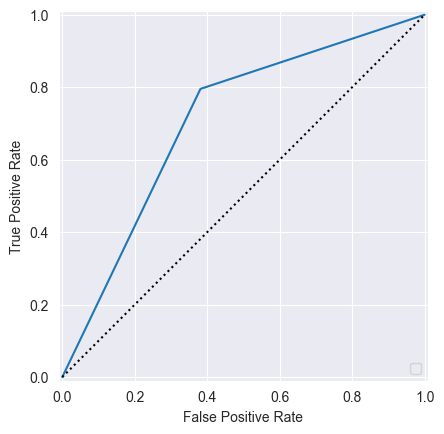

In [89]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot([0, 1], [0, 1], color='black', linestyle=':')
plt.show()

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.62      0.68      6184
           1       0.68      0.80      0.74      6402

    accuracy                           0.71     12586
   macro avg       0.71      0.71      0.71     12586
weighted avg       0.71      0.71      0.71     12586



## Le cas Arthur

Arthur est un homme de 53 ans, fumeur, sportif, 175 cm, 85 kg, avec une pression artérielle systolique de 130, une pression artérielle diastolique de 85.

Est-ce qu'Arthur a un risque de maladie cardiovasculaire ?